ON sales dataset


Comparison of GD, Momentum, and NAG:
  Method  Iters  Time(s)  Final Loss
Momentum     33 0.000523    4.200154
     NAG     35 0.000610    3.129971
      GD   1214 0.018171    1.353003


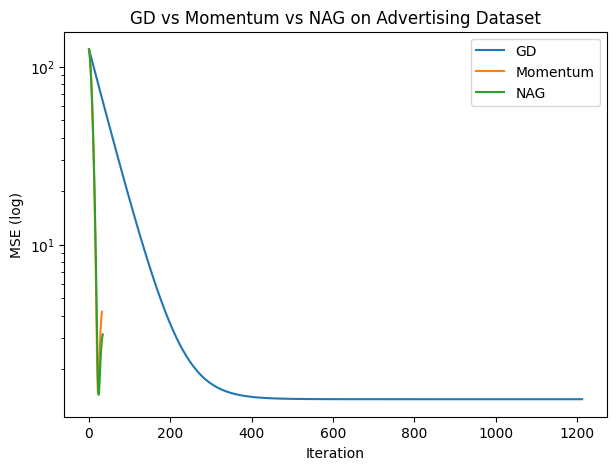

Fastest by iterations: Momentum
Fastest by wall time: Momentum


In [ ]:
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt

# Load dataset (already in your Colab)
df = pd.read_csv("advertising.csv").dropna()
X = df[["TV","Radio","Newspaper"]].values.astype(float)
y = df["Sales"].values.astype(float).reshape(-1,1)

# Standardize features
mu, sigma = X.mean(axis=0), X.std(axis=0)+1e-12
X = (X-mu)/sigma
X = np.c_[np.ones((X.shape[0],1)),X]

# Functions
def mse(X,y,w):
    r=X@w-y
    return (r.T@r/(2*len(y)))[0,0] # 1x1 matrix

def grad(X,y,w):
    return (X.T@(X@w-y))/len(y)

def run_opt(X,y,lr=0.01,gamma=0.9,max_iter=5000,tol=1e-8,patience=10,mode="gd"):
    # (n_feature,1) , tol -> atleast decrease loss this much
    w=np.zeros((X.shape[1],1)); v=np.zeros_like(w)
    losses=[]; t0=time.time(); best=float("inf"); noimp=0 #no improvement
    for it in range(max_iter):
        if mode=="gd":
            g=grad(X,y,w); v=lr*g; w=w-v
        elif mode=="momentum":
            g=grad(X,y,w); v=gamma*v+lr*g; w=w-v
        elif mode=="nag":
            g=grad(X,y,w-gamma*v); v=gamma*v+lr*g; w=w-v
        L=mse(X,y,w); losses.append(L)
        if best-L>tol: best=L; noimp=0
        else: noimp+=1
        if noimp>=patience: break
    return {"losses":np.array(losses),"iters":len(losses),"time":time.time()-t0}

# Run all three
results={}
results["GD"]=run_opt(X,y,mode="gd")
results["Momentum"]=run_opt(X,y,mode="momentum")
results["NAG"]=run_opt(X,y,mode="nag")

# Tabular results
rows=[]
for k,v in results.items():
    rows.append([k,v["iters"],v["time"],v["losses"][-1]])
tbl=pd.DataFrame(rows,columns=["Method","Iters","Time(s)","Final Loss"])
print("Comparison of GD, Momentum, and NAG:")
print(tbl.sort_values(by=["Iters","Time(s)"]).to_string(index=False))

# Plot loss curves
plt.figure(figsize=(7,5))
for k in results: plt.plot(results[k]["losses"],label=k)
plt.yscale("log"); plt.xlabel("Iteration"); plt.ylabel("MSE (log)")
plt.title("GD vs Momentum vs NAG on Advertising Dataset")
plt.legend(); plt.show()

best_it=tbl.sort_values(by="Iters").iloc[0]["Method"]
best_time=tbl.sort_values(by="Time(s)").iloc[0]["Method"]
print("Fastest by iterations:",best_it)
print("Fastest by wall time:",best_time)

on Housing dataset


Comparison of GD, Momentum, and NAG:
  Method  Iters  Time(s)   Final Loss
Momentum     17 0.000426 2.144785e+12
     NAG     18 0.000657 1.078504e+12
      GD    764 0.016592 5.555939e+11


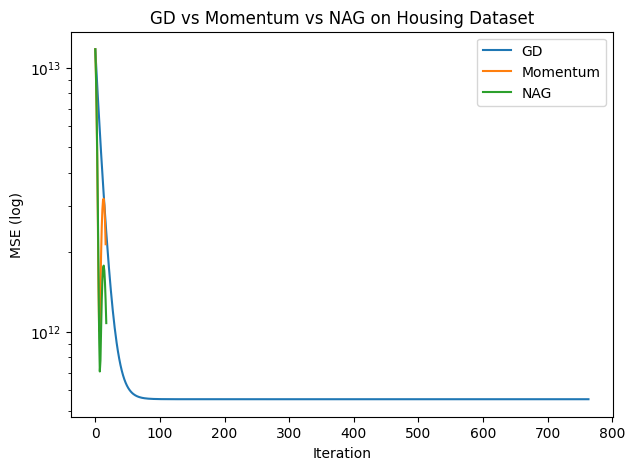

Fastest by iterations: Momentum
Fastest by wall time: Momentum


In [ ]:
import pandas as pd, numpy as np, time, matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Housing.csv")

# Target
y = df["price"].values.astype(float).reshape(-1,1)
X = df.drop(columns=["price"])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numeric features
mu, sigma = X.mean(axis=0), X.std(axis=0)+1e-12
X = (X-mu)/sigma

# Add bias term
X = np.c_[np.ones((X.shape[0],1)),X.values]

# Functions
def mse(X,y,w):
    r=X@w-y
    return (r.T@r/(2*len(y)))[0,0]

def grad(X,y,w):
    return (X.T@(X@w-y))/len(y)

def run_opt(X,y,lr=0.05,gamma=0.9,max_iter=5000,tol=1e-8,patience=10,mode="gd"):
    w=np.zeros((X.shape[1],1)); v=np.zeros_like(w)
    losses=[]; t0=time.time(); best=float("inf"); noimp=0
    for it in range(max_iter):
        if mode=="gd":
            g=grad(X,y,w); v=lr*g; w=w-v
        elif mode=="momentum":
            g=grad(X,y,w); v=gamma*v+lr*g; w=w-v
        elif mode=="nag":
            g=grad(X,y,w-gamma*v); v=gamma*v+lr*g; w=w-v
        L=mse(X,y,w); losses.append(L)
        if best-L>tol: best=L; noimp=0
        else: noimp+=1
        if noimp>=patience: break
    return {"losses":np.array(losses),"iters":len(losses),"time":time.time()-t0}

# Run all three
results={}
results["GD"]=run_opt(X,y,mode="gd")
results["Momentum"]=run_opt(X,y,mode="momentum")
results["NAG"]=run_opt(X,y,mode="nag")

# Tabular results
rows=[]
for k,v in results.items():
    rows.append([k,v["iters"],v["time"],v["losses"][-1]])
tbl=pd.DataFrame(rows,columns=["Method","Iters","Time(s)","Final Loss"])
print("Comparison of GD, Momentum, and NAG:")
print(tbl.sort_values(by=["Iters","Time(s)"]).to_string(index=False))

# Plot loss curves
plt.figure(figsize=(7,5))
for k in results: plt.plot(results[k]["losses"],label=k)
plt.yscale("log"); plt.xlabel("Iteration"); plt.ylabel("MSE (log)")
plt.title("GD vs Momentum vs NAG on Housing Dataset")
plt.legend(); plt.show()

best_it=tbl.sort_values(by="Iters").iloc[0]["Method"]
best_time=tbl.sort_values(by="Time(s)").iloc[0]["Method"]
print("Fastest by iterations:",best_it)
print("Fastest by wall time:",best_time)